In [1]:
import numpy as np
import pandas as pd #基础分析包
import matplotlib# 导入可视化包
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from pylab import mpl
mpl.rcParams['font.sans-serif'] = ['KaiTi']
mpl.rcParams['axes.unicode_minus'] = False

In [3]:
data = pd.read_excel('Bilibili powerUP 100.xlsx')
print(data.shape)

(100, 9)


In [4]:
data.dtypes

Unnamed: 0      int64
UID             int64
昵称             object
分区             object
性别             object
粉丝数           float64
投稿数             int64
获赞数           float64
播放数           float64
dtype: object

In [5]:
pd.set_option('float_format', '{:.2f}'.format)
data.describe()

,Unnamed: 0,UID,粉丝数,投稿数,获赞数,播放数
count,100.00,100.00,100.00,100.00,100.00,100.00
mean,50.92,174425342.65,416.29,503.20,2680.30,43034.20
std,29.73,300192708.87,396.04,461.40,2327.11,37518.99
min,0.00,63231.00,97.00,49.00,292.50,5995.00
25%,24.75,3281397.25,203.25,201.25,1201.45,17750.00
50%,51.50,26190083.00,276.85,397.50,1826.55,29000.00
75%,76.25,284618142.50,540.88,673.25,3334.18,53000.00
max,101.00,1869712375.00,2956.60,3273.00,12000.00,203000.00


In [6]:
data.describe(include=['O'])

,昵称,分区,性别
count,100,100,100
unique,100,15,3
top,莴苣某人,游戏,男
freq,1,19,73


In [7]:
data.head()

,Unnamed: 0,UID,昵称,分区,性别,粉丝数,投稿数,获赞数,播放数
0,0,1773346,莴苣某人,游戏,男,548.50,258,1462.00,51000.00
1,1,25876945,极客湾Geekerwan,科技,男,370.60,400,1903.20,33000.00
2,2,296092268,碎嘴企鹅,游戏,男,245.70,171,3253.10,25000.00
3,3,517327498,罗翔说刑法,知识,男,2956.60,353,8482.70,85000.00
4,4,113362335,老实憨厚的笑笑,游戏,男,278.30,3273,687.60,65000.00


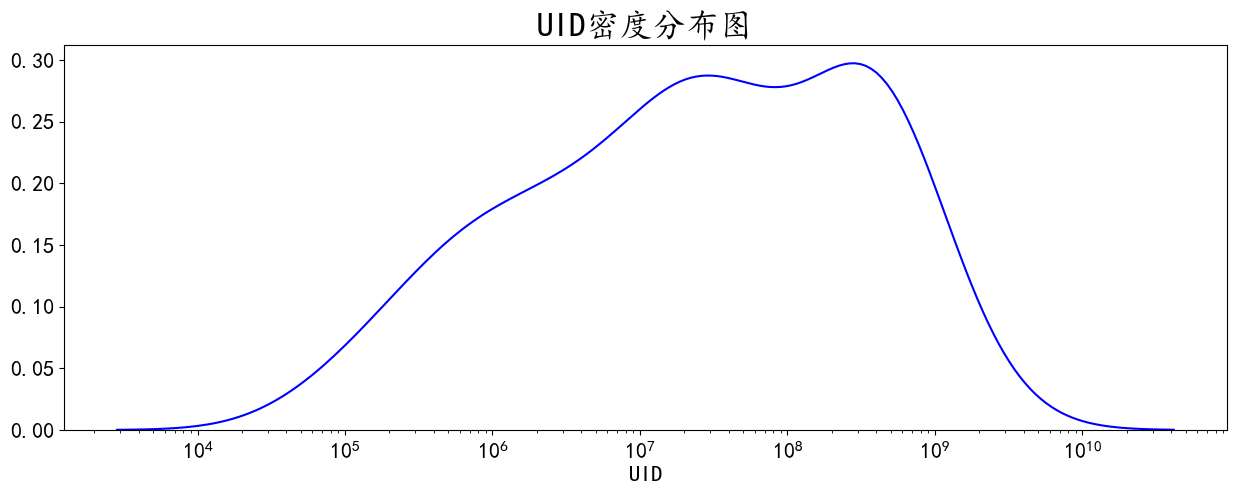

In [8]:
plt.rcParams['figure.figsize'] = (15, 5)
a = sns.kdeplot(data['UID'], color = 'blue', log_scale=True)    
plt.xlabel('UID', fontsize = 16)  
plt.xticks(fontsize=16)    
plt.yticks(fontsize=16)     
plt.title('UID密度分布图', fontsize = 24)   
a.set(ylabel=None)
plt.show()

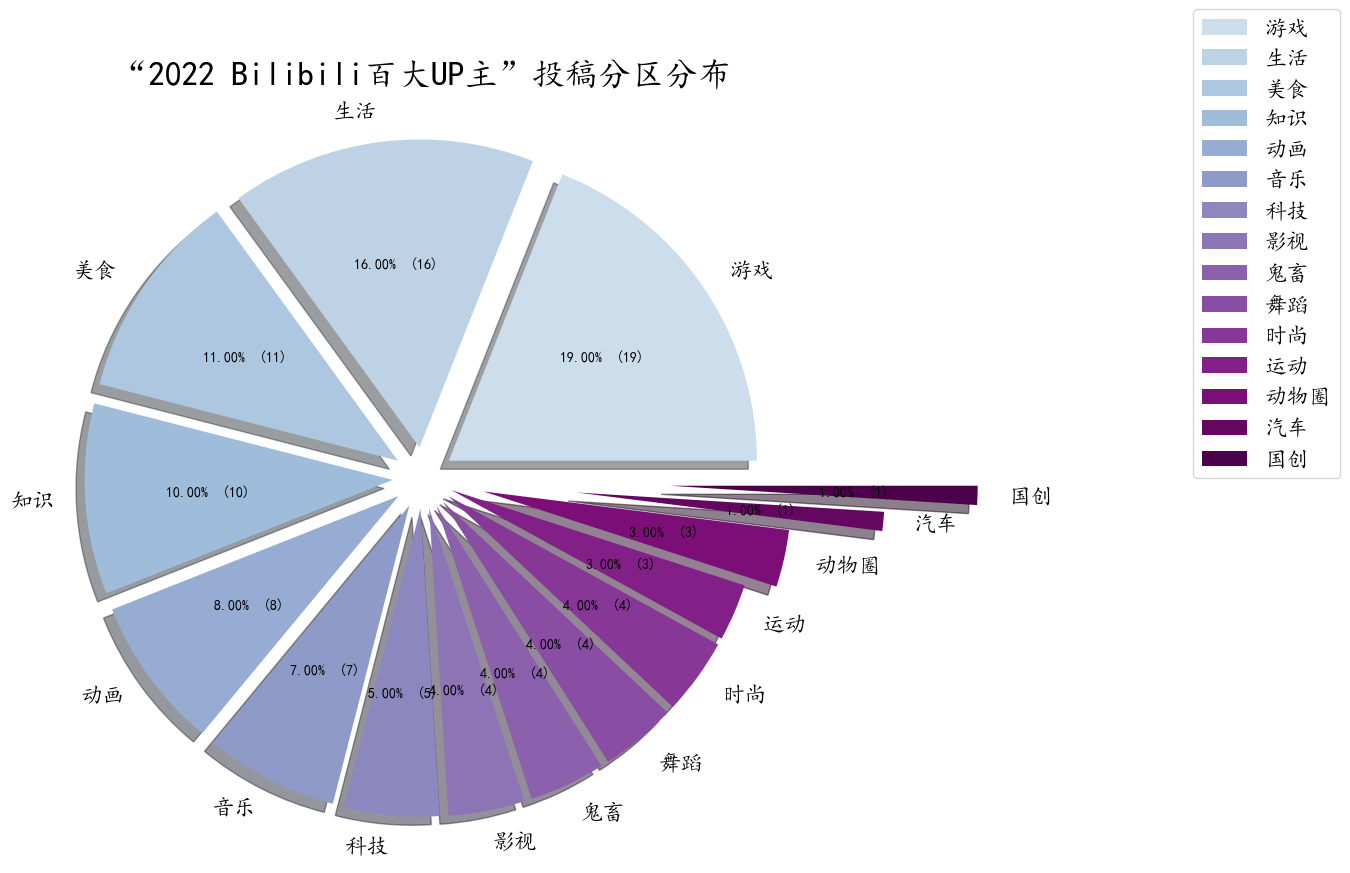

In [9]:


labels = ['游戏','生活','美食','知识','动画','音乐','科技','影视','鬼畜','舞蹈','时尚','运动','动物圈','汽车','国创']  
sizes = data['分区'].value_counts()   
colors = plt.cm.BuPu(np.linspace(0.2, 1, 15)) 
explode = [0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.2, 0.5, 0.8]

def make_autopct(sizes):
    def my_autopct(pct):
        total = sum(sizes)
        val = int(round(pct*total/100.0))
        return '{p:.2f}%  ({v:d})'.format(p=pct,v=val)
    return my_autopct

plt.rcParams['figure.figsize'] = (10, 10)
patches, l_text, p_text = plt.pie(sizes, labels = labels, colors = colors, explode = explode, autopct=make_autopct(sizes), shadow = True) 
plt.title('“2022 Bilibili百大UP主”投稿分区分布', fontsize = 24) 
for _ in l_text:
    _.set_size(16)
for __ in p_text:
    __.set_size(10)

plt.legend(loc = (1.5,0.5), fontsize = 16)  
plt.show()

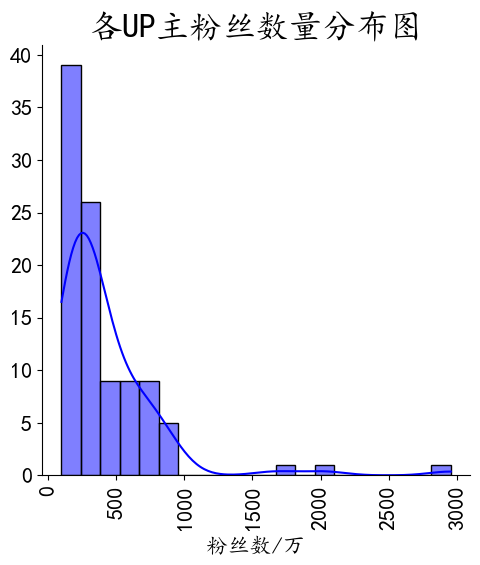

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = (15, 5)
sns.displot(data['粉丝数'], kde=True, color='blue')  
plt.xlabel('粉丝数/万', fontsize=16)
plt.xticks(fontsize=16, rotation=90)
plt.yticks(fontsize=16)
plt.title('各UP主粉丝数量分布图', fontsize=24)
plt.ylabel(None)
plt.show()

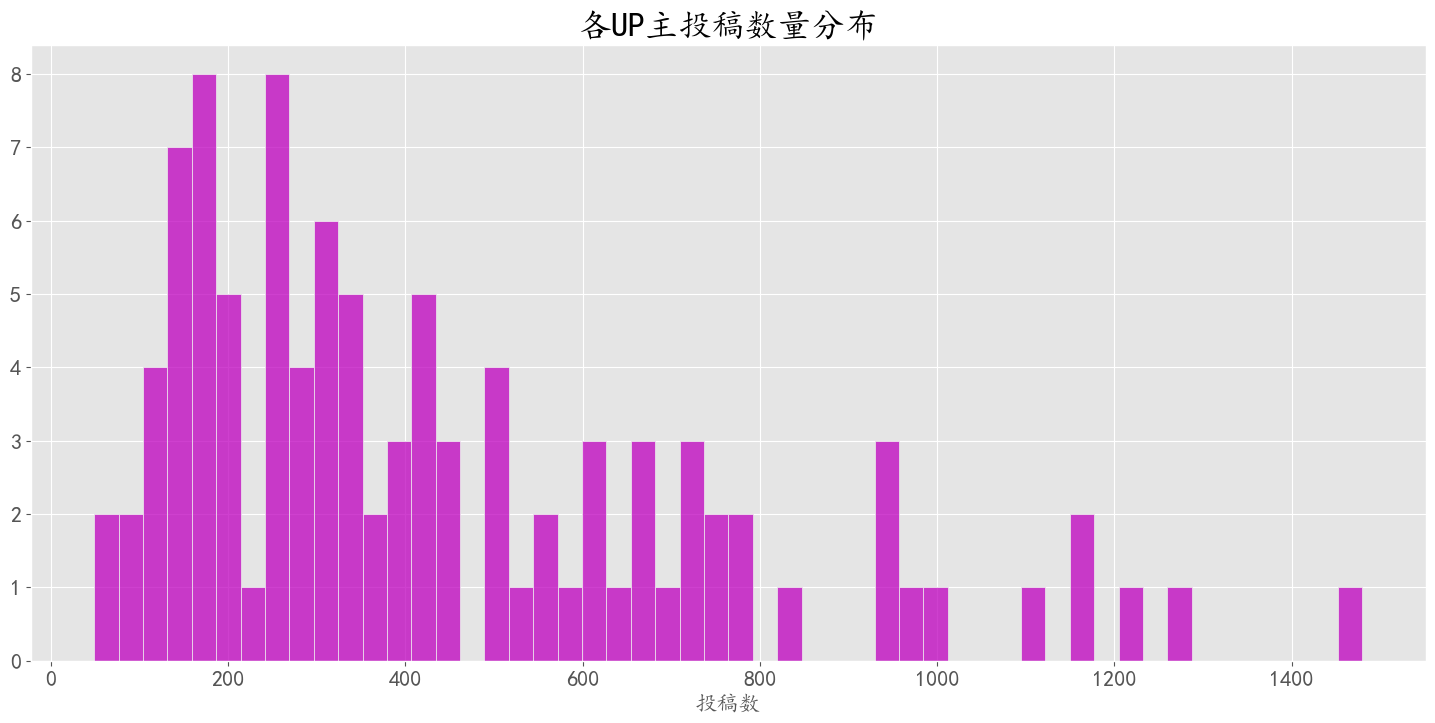

In [58]:
import seaborn as sns
import matplotlib.pyplot as plt

x = data['投稿数']

plt.figure(figsize=(18, 8))
plt.style.use('ggplot')

sns.histplot(x, bins=52, kde=False, color='m')  # 使用histplot代替distplot
plt.xlabel("投稿数", fontsize=16)
plt.ylabel(None)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.title('各UP主投稿数量分布', fontsize=24)
plt.show()

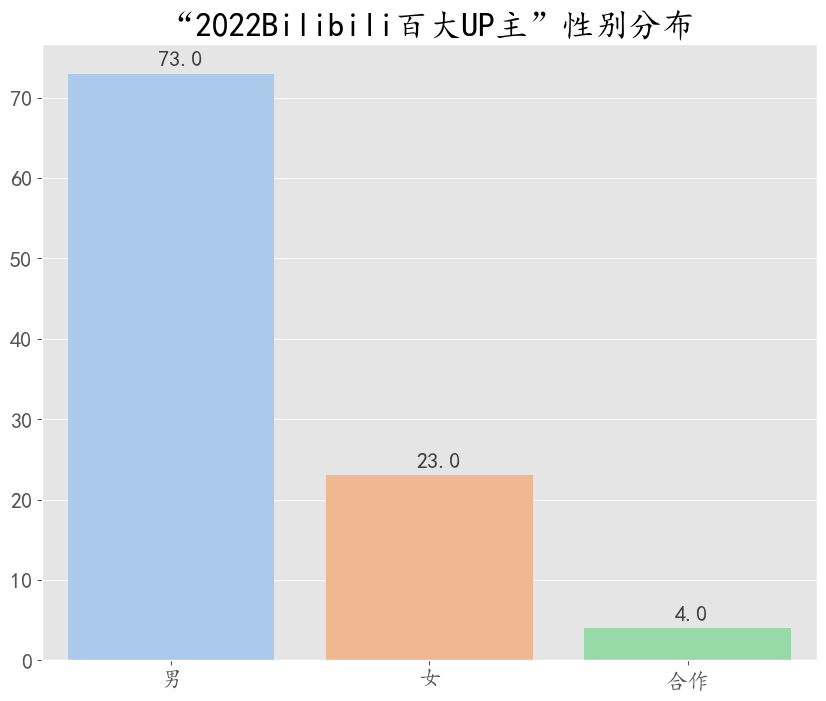

In [59]:
plt.figure(figsize = (10, 8))
a = sns.countplot(x = '性别', data = data, palette = 'pastel')  
for _ in a.patches:     
    a.annotate(f'\n{_.get_height()}', (_.get_x() + 0.35, _.get_height() + 1), color = '#3F3F3F', size = 16) 
plt.xticks(fontsize = 16)     
plt.yticks(fontsize = 16)     
a.set_title(label = '“2022Bilibili百大UP主”性别分布', fontsize = 24)  
a.set(xlabel = None, ylabel = None)
plt.show()

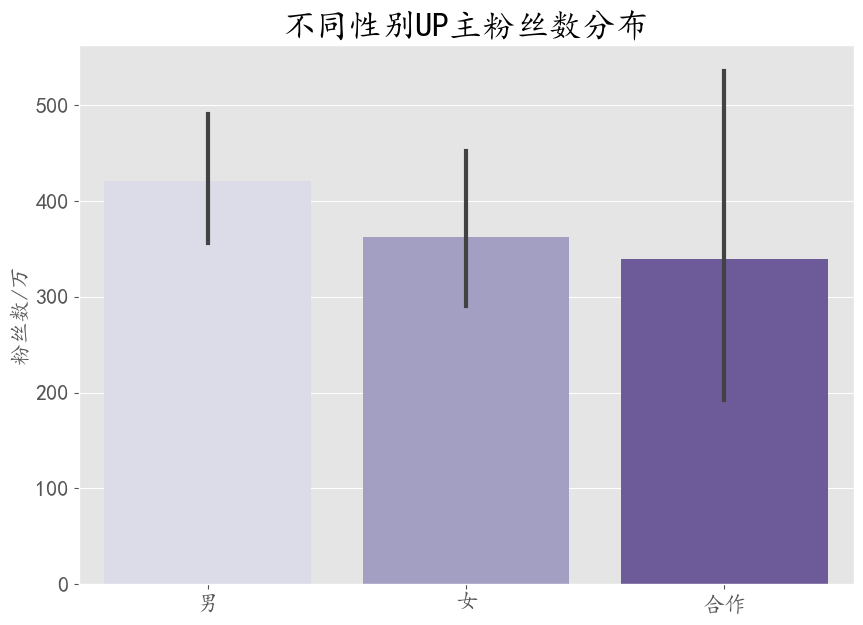

In [60]:
plt.rcParams['figure.figsize'] = (10, 7)
a = sns.barplot(x = data['性别'], y = data['粉丝数'], palette = 'Purples', errwidth = 3)   
plt.xticks(fontsize=16)    
plt.yticks(fontsize=16)    
plt.ylabel('粉丝数/万', fontsize = 16) 
a.set_title(label = '不同性别UP主粉丝数分布', fontsize = 24) 
a.set(xlabel = None)
plt.show()

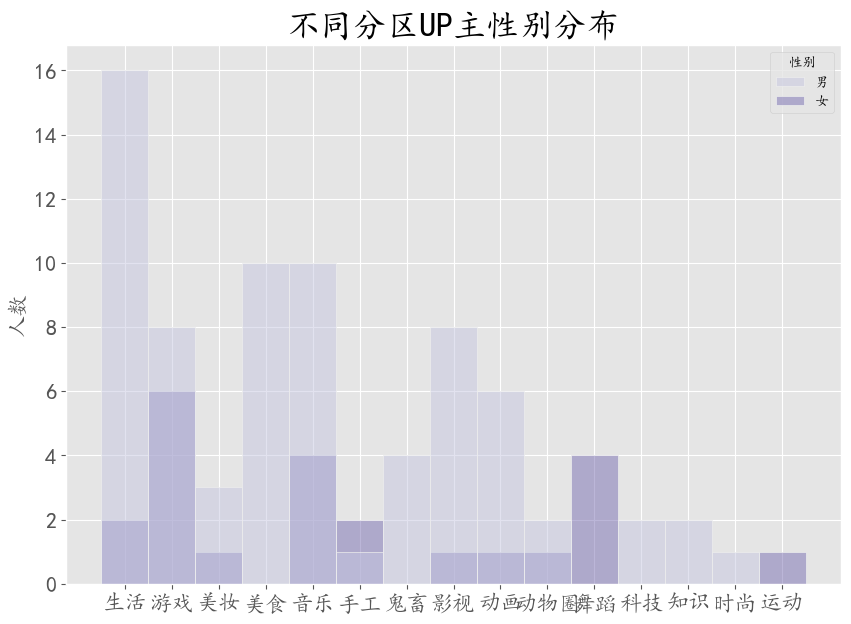

In [61]:
plt.rcParams['figure.figsize'] = (10, 7)
_data = data[data != '合作']
a = sns.histplot(data = _data, x='分区', hue='性别', palette = 'Purples')
plt.xticks(fontsize=16)  
plt.yticks(fontsize=16)     
plt.ylabel('人数', fontsize = 16)     
a.set_title(label = '不同分区UP主性别分布', fontsize = 24)  
a.set(xlabel = None)
plt.show()

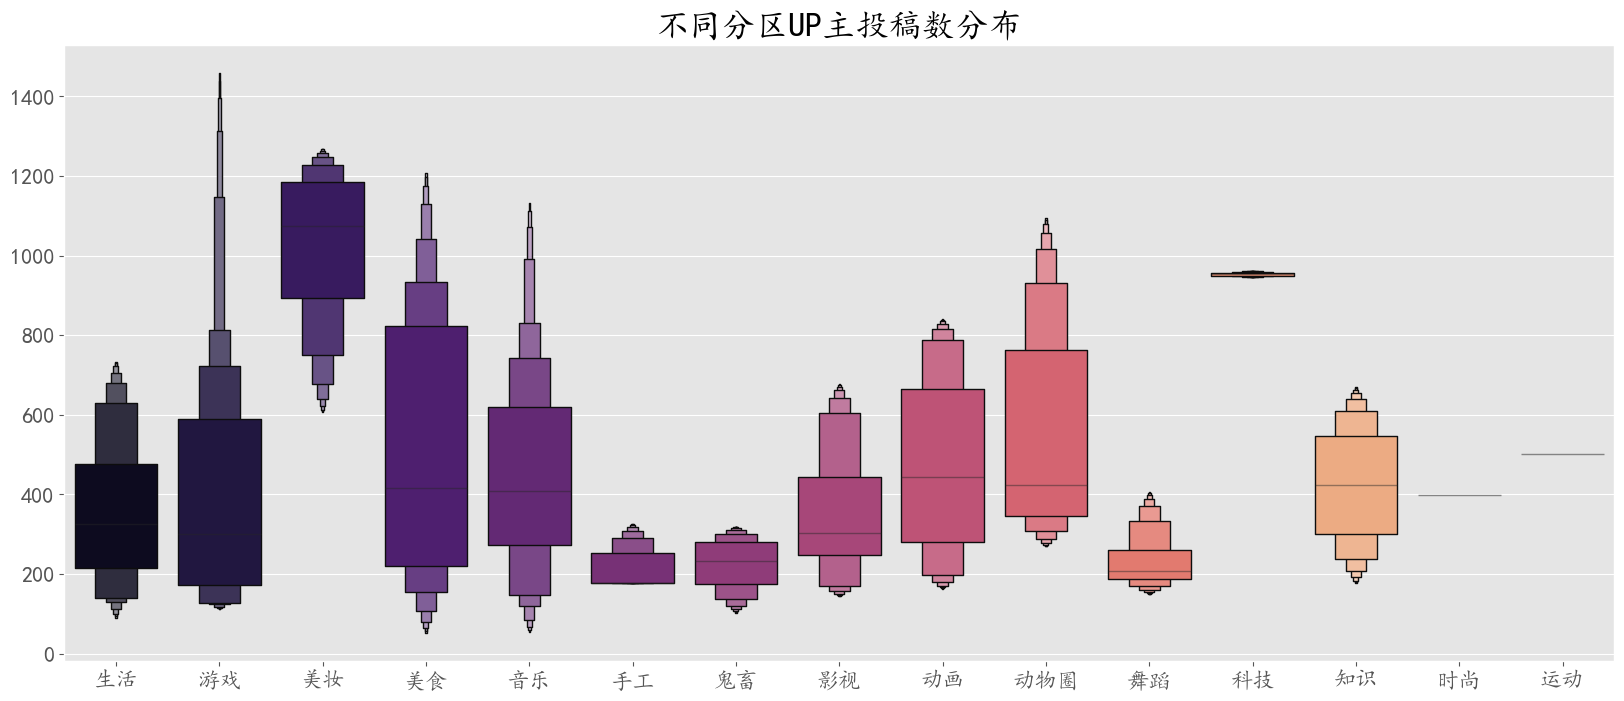

In [62]:
plt.rcParams['figure.figsize'] = (20, 8)
a = sns.boxenplot(x = '分区', y = '投稿数', data = data, palette = 'magma', k_depth='proportion', linewidth=1, showfliers=False)      #绘制加强的箱型图
a.set_xlabel(xlabel = None)
a.set_ylabel(ylabel = None)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
a.set_title(label = '不同分区UP主投稿数分布', fontsize = 24)
plt.show()

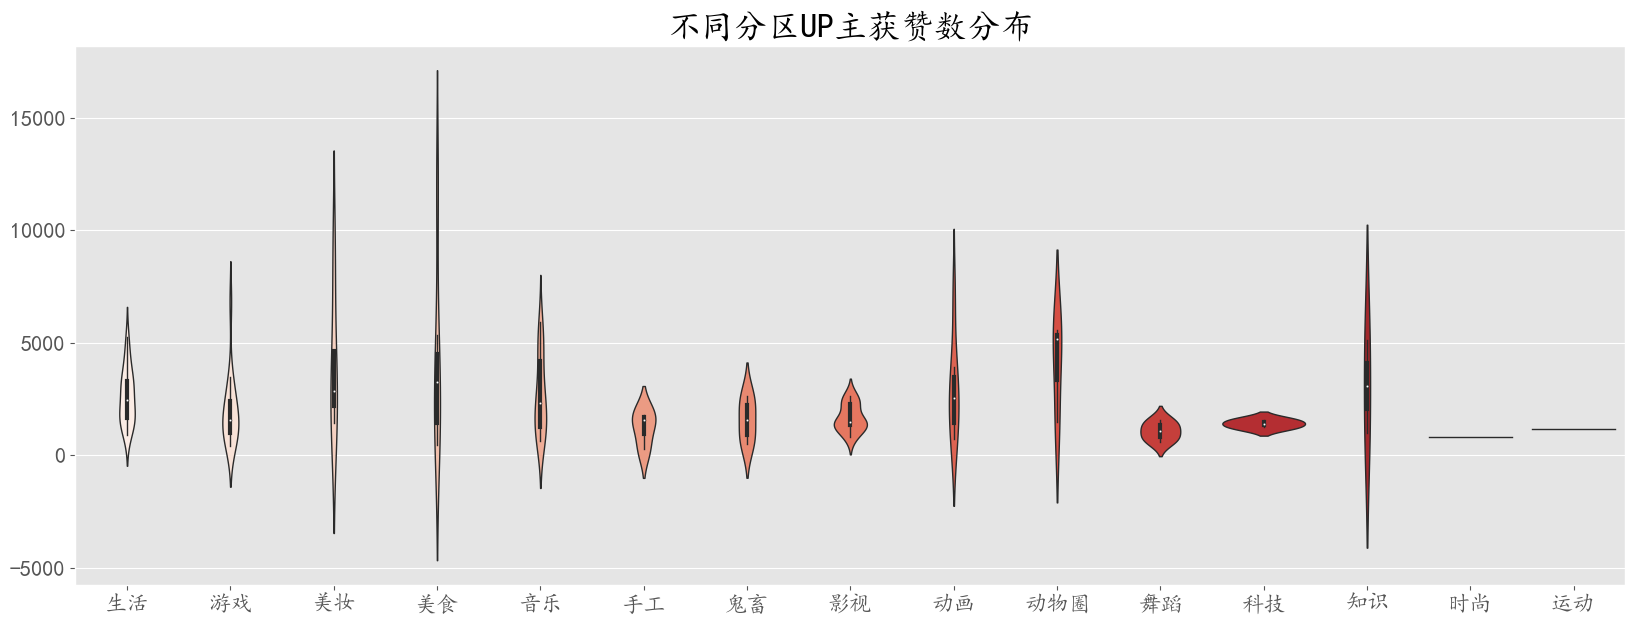

In [63]:
plt.rcParams['figure.figsize'] = (20, 7)
ax = sns.violinplot(x = data['分区'], y = data['获赞数'], palette = 'Reds', linewidth=1)    #绘制小提琴图
ax.set_xlabel(xlabel = None)
ax.set_ylabel(ylabel = None)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
ax.set_title(label = '不同分区UP主获赞数分布', fontsize = 24)
plt.show()

In [64]:
size_mapping = {
           '男': 0,
           '女': 1,
           '合作': 2,
           '游戏': 3,
           '生活': 4,
           '美食': 5,
           '知识': 6,
           '动画': 7,
           '音乐': 8,
           '科技': 9,
           '影视': 10,
           '鬼畜': 11,
           '舞蹈': 12,
           '时尚': 13,
           '运动': 14,
           '动物圈': 15,
           '汽车': 16,
           '国创': 17}
data['性别\''] = data['性别'].map(size_mapping)
data['分区\''] = data['分区'].map(size_mapping)

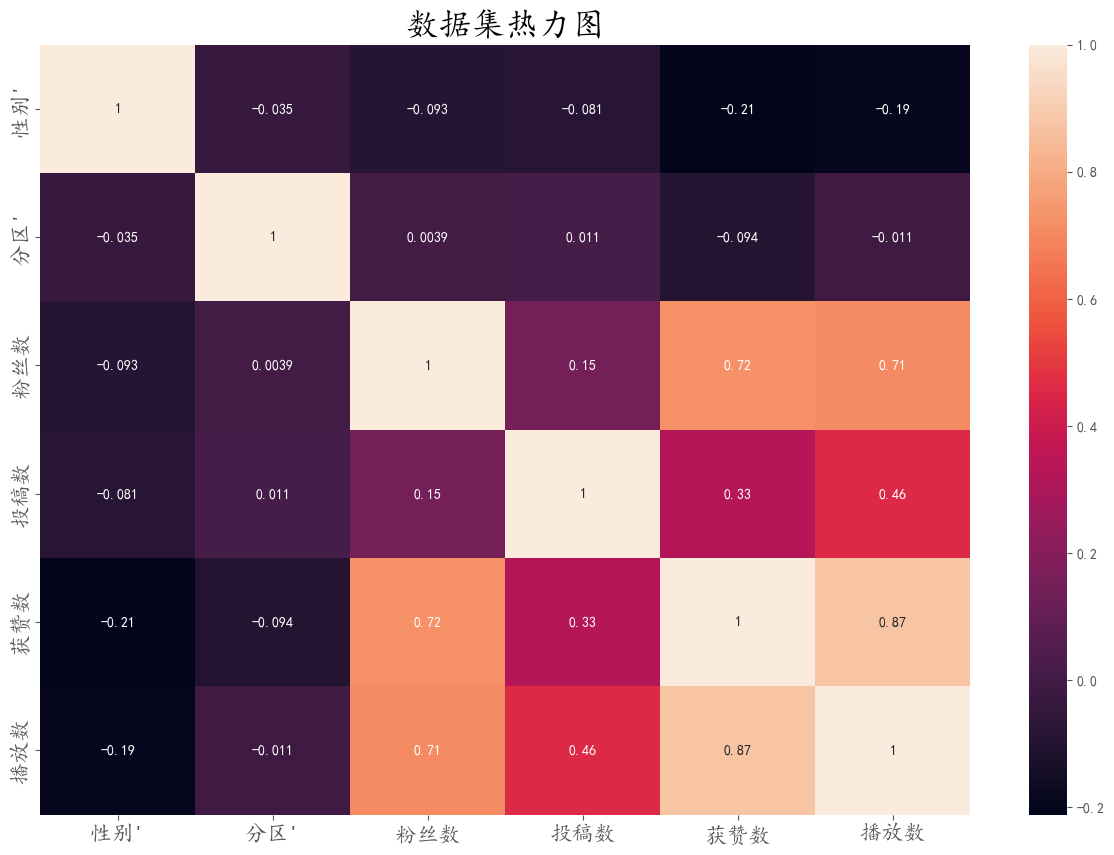

In [65]:
plt.rcParams['figure.figsize'] = (15, 10)
sns.heatmap(data[['性别\'','分区\'','粉丝数','投稿数','获赞数','播放数']].corr(), annot = True) 
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.title('数据集热力图', fontsize = 24)
plt.show()

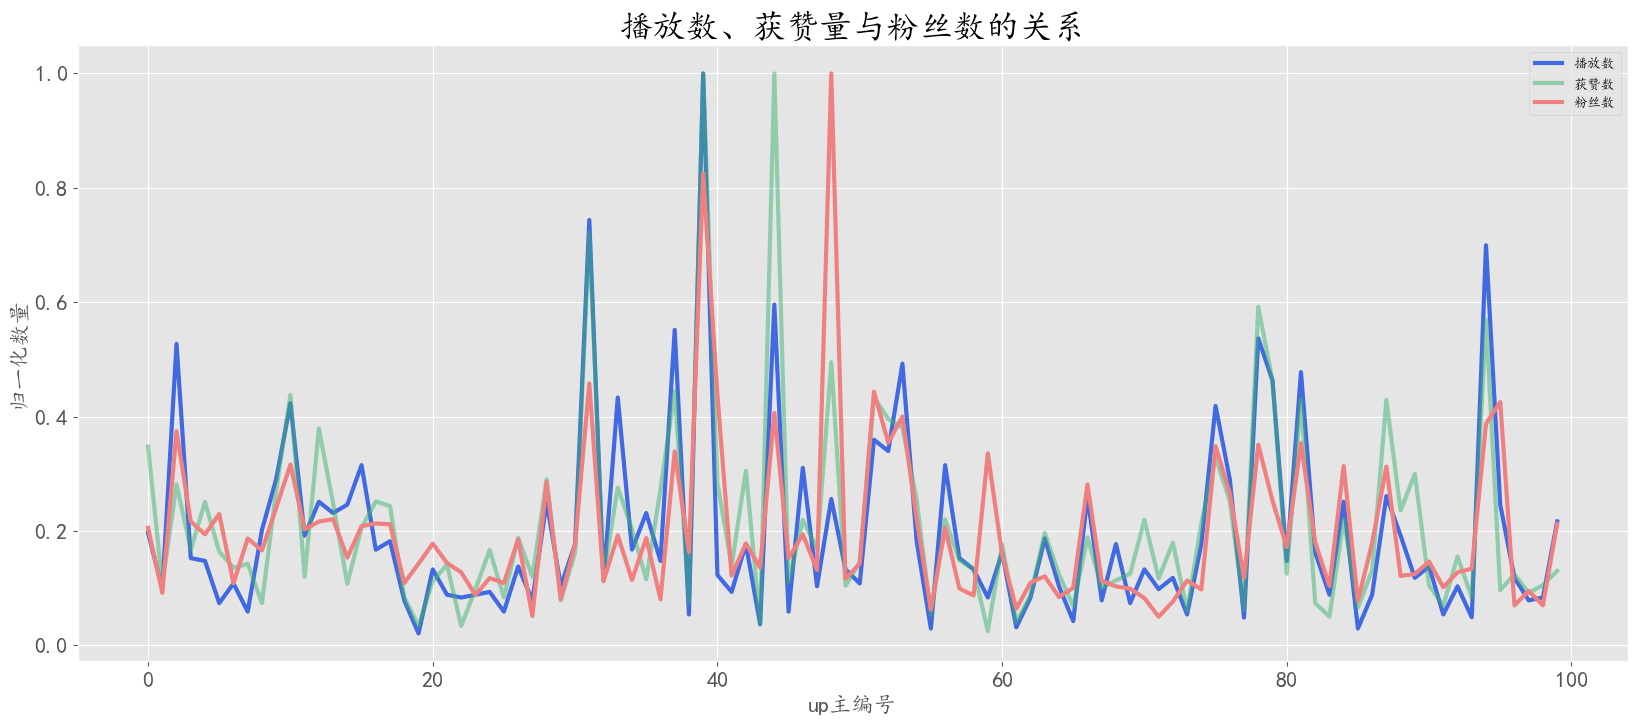

In [66]:
bofang_norm = data.播放数 / data.播放数.max()
huozan_norm = data.获赞数 / data.获赞数.max()
fensi_norm = data.粉丝数 / data.粉丝数.max()
plt.figure(figsize=(20,8))
plt.plot(bofang_norm,label ='播放数', alpha=1, color = 'royalblue', linewidth = 3) 
plt.plot(huozan_norm, label = '获赞数',alpha=0.5, color = 'mediumseagreen', linewidth = 3)
plt.plot(fensi_norm, label = '粉丝数',alpha=1, color = 'lightcoral', linewidth = 3)
plt.xlabel('up主编号', fontsize=16)
plt.ylabel('归一化数量', fontsize=16)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.title('播放数、获赞量与粉丝数的关系', fontsize = 24)
plt.legend()
plt.show()